In [5]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import numpy as np

In [7]:
rawdata = pd.read_csv('vgsales.csv')
newdata = rawdata.dropna()

target = newdata[['Global_Sales']].copy()

Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)

rule = ((target<(Q1-1.5*(Q3-Q1))) | (target>(Q3+1.5*(Q3-Q1))))

outliers = rule.any(axis = 1)

outlierindices = outliers.index[outliers == True]

newdata.drop(index=outlierindices, inplace = True)
data = newdata.drop(columns = ['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
data.head()


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Platform,Year,Genre,Publisher,Global_Sales
1847,Guitar Hero 5,PS3,2009,Misc,Activision,1.1
1848,Megamania,2600,1981,Shooter,Activision,1.1
1849,Medal of Honor: Airborne,X360,2007,Shooter,Electronic Arts,1.1
1850,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,Nintendo,1.1
1851,Jungle Hunt,2600,1982,Platform,Atari,1.1


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

platnum = le.fit_transform(data['Platform'])
gennum = le.fit_transform(data['Genre'])
pubnum = le.fit_transform(data['Publisher'])
#encoded_plat = pd.DataFrame(platnum)
data['encoded_Platform'] = platnum
data['encoded_Genre'] = gennum
data['encoded_Publisher'] = pubnum
data['Global_Sales'] = data['Global_Sales'].apply(lambda x: x*1000)
print(data)

data['encoded_Platform'].value_counts()
data['encoded_Genre'].value_counts()
data['encoded_Publisher'].value_counts()


                                                   Name Platform  Year  \
1847                                      Guitar Hero 5      PS3  2009   
1848                                          Megamania     2600  1981   
1849                           Medal of Honor: Airborne     X360  2007   
1850              The Legend of Zelda: Tri Force Heroes      3DS  2015   
1851                                        Jungle Hunt     2600  1982   
...                                                 ...      ...   ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594                     Men in Black II: Alien Escape       GC  2003   
16595  SCORE International Baja 1000: The Official Game      PS2  2008   
16596                                        Know How 2       DS  2010   
16597                                  Spirits & Spells      GBA  2003   

          Genre        Publisher  Global_Sales  encoded_Platform  \
1847       Misc       Activision        110

136    1043
344     885
21      822
518     820
272     768
       ... 
371       1
332       1
402       1
426       1
517       1
Name: encoded_Publisher, Length: 568, dtype: int64

DS      2009
PS2     1835
Wii     1156
PSP     1150
PS3     1088
X360    1029
PS      1014
PC       876
XB       756
GBA      723
GC       500
3DS      454
PSV      403
N64      270
PS4      268
SNES     194
SAT      171
XOne     171
WiiU     127
2600      98
DC        47
GB        46
NES       32
GEN       16
NG        12
WS         6
SCD        5
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<Figure size 1440x1440 with 0 Axes>

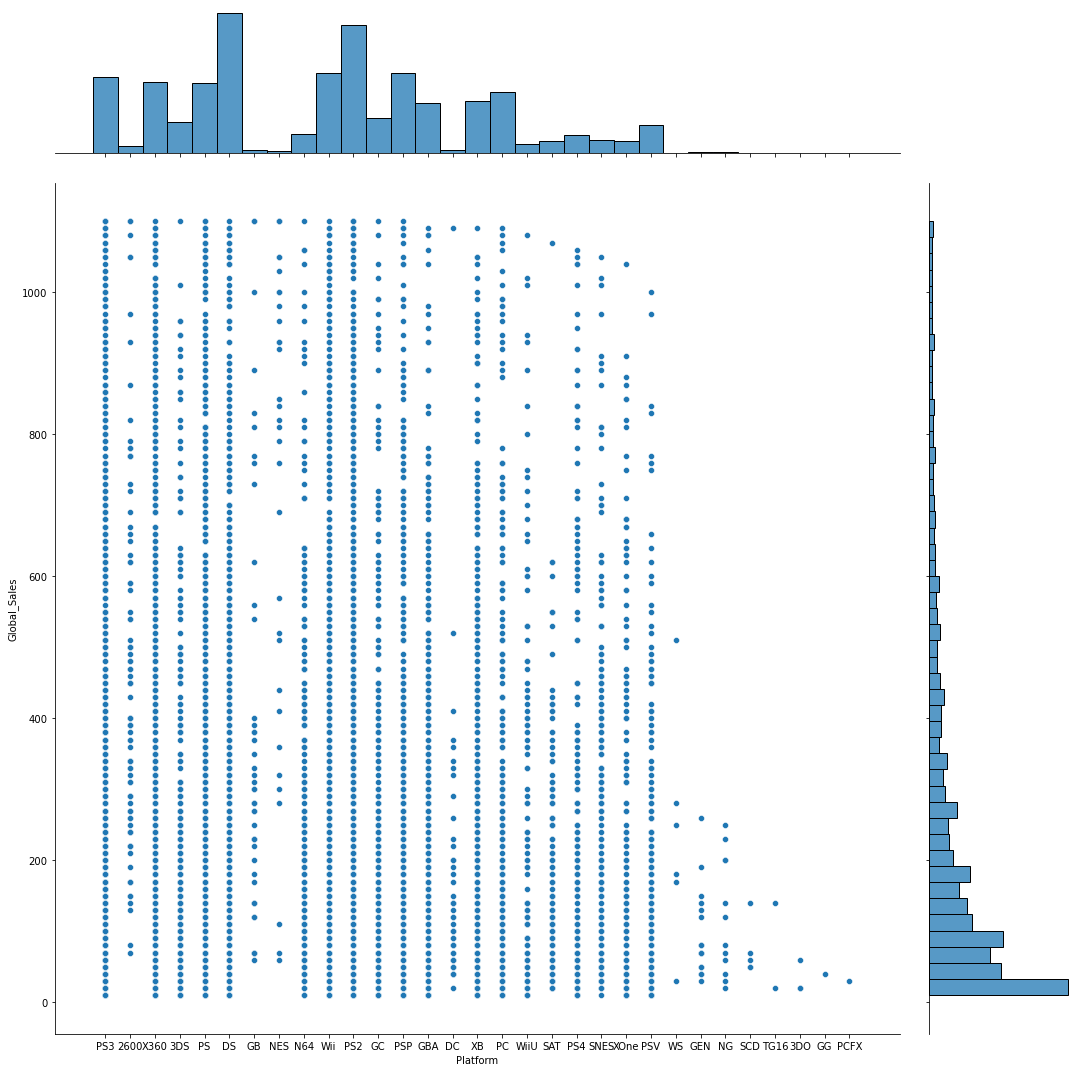

In [16]:
f = plt.figure(figsize = (20,20))
sb.jointplot(data = data,x ='Platform', y=  'Global_Sales',height= 15)
data['Platform'].value_counts()


2009    1331
2008    1285
2010    1146
2007    1077
2011    1035
2006     927
2005     857
2002     740
2003     688
2004     645
2012     584
2015     556
2014     504
2013     464
2001     401
2016     328
1998     312
2000     302
1999     285
1997     240
1996     225
1995     201
1994     101
1993      46
1981      37
1982      31
1991      31
1992      24
1983      11
1987       9
1985       9
1989       6
1980       6
1986       5
1984       4
1988       4
2017       3
1990       2
2020       1
Name: Year, dtype: int64

<Figure size 144x1440 with 0 Axes>

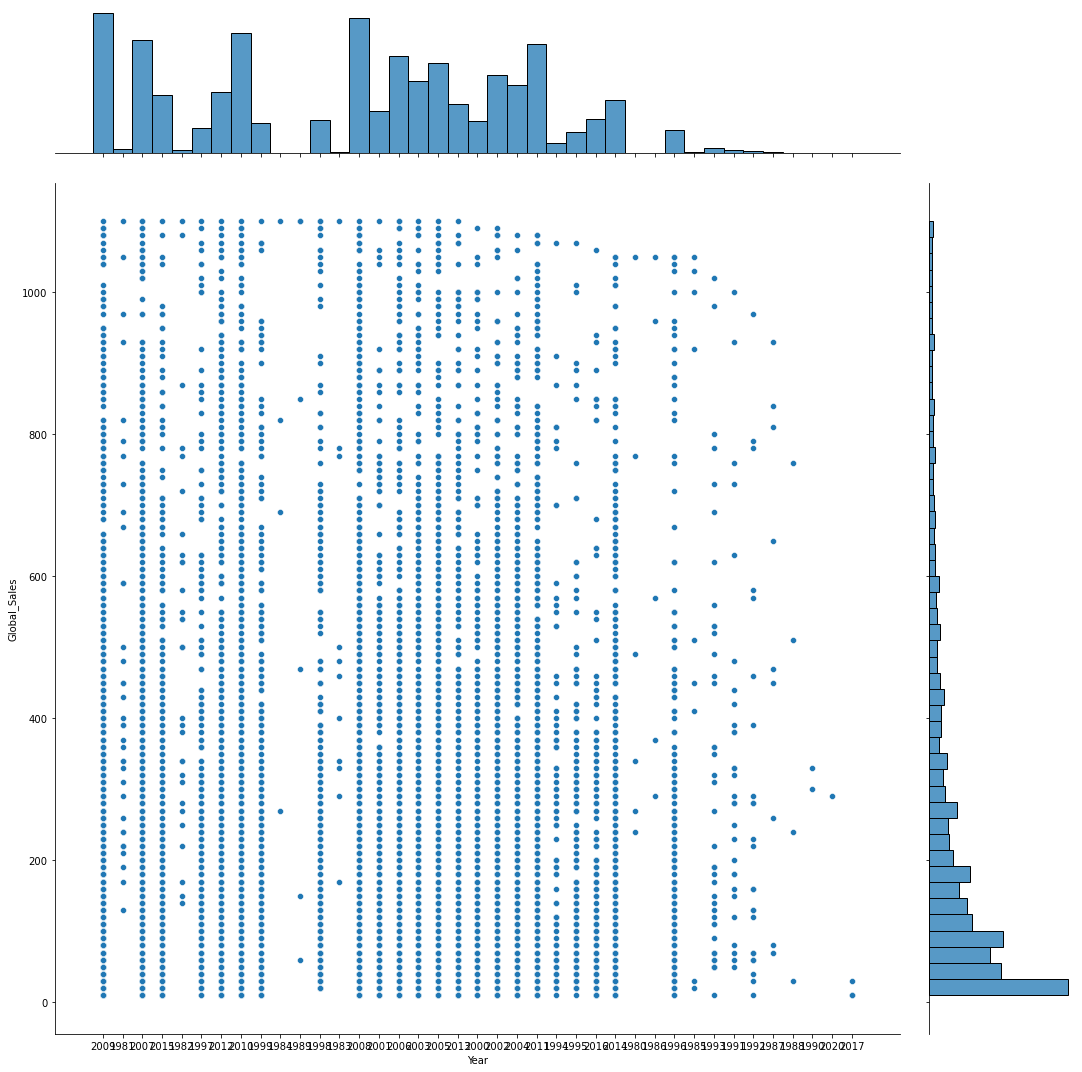

In [24]:
## Year vs Sales
f = plt.figure(figsize = (,20))
sb.jointplot(data = data,x ='Year', y=  'Global_Sales',height= 15)


data['Year'].value_counts()


In [ ]:
## Genre vs Sales
pltx.scatter(data, 'Genre', 'Global_Sales')
data['Genre'].value_counts()


In [ ]:
## Publisher vs Sales
pltx.scatter(data, 'Publisher', 'Global_Sales')
data['Publisher'].value_counts()


In [ ]:
## Year vs Platform
pltx.scatter(data, 'Year', 'Platform', width = 800, height = 800)


In [ ]:
## Year vs Publisher
pltx.scatter(data, 'Year', 'Publisher', width = 800, height = 800)


In [ ]:
## Year vs Genre
pltx.scatter(data, 'Year', 'Genre', width = 800, height = 800)


In [ ]:
## Platform vs Publisher
pltx.scatter(data, 'Platform', 'Publisher', width = 1000, height = 1000)


In [ ]:
## Platform vs Genre
pltx.scatter(data, 'Platform', 'Genre', width = 1000, height = 1000)


In [ ]:
## Publisher vs Genre
pltx.scatter(data, 'Publisher', 'Genre', width = 1000, height = 1000)
